<a name="outline"></a>

## Outline

- [Task 1](#task-1): Regression
  - [1.1](#q11) Linear regression
  - [1.2](#q12) Ridge regression
  - [1.3](#q13) Relaxation of Lasso regression
- [Task 2](#task-2): Classification
  - [2.1](#q21) kNN classifier
  - [2.2](#q22) Random forest 
  - [2.3](#q23) Support vector machine (SVM) 
- [Task 3](#task-3): Mastery component 
  - [3.1](#q31) Logistic regression and bagging 
  - [3.2](#q32) Kernelised SVM classifier 

<a name="task-1"></a>
# Task 1: Regression [^](#outline)



<a name="q11"></a>

## 1.1  [^](#outline) Linear regression



The linear regression model is formulated in the follow manner.

Let $Y=(Y_1,...,Y_n)^T$ and $ε=(ε_1,...,ε_n)$

Here $β = (β_1, . . . , β_p)$ and $X=(X_{i,j})$ the $nxp$ matrix containing the values of $X_{i,j}$ values of X on the ith individual and jth variable.

The linear model can be summarised as:

$$Y=Xβ+ε$$

We assume here that  $ε$ is a n-vector of IID random variables with 0 mean and variance $\sigma^2$.

In my code below i use the least squares method for parameter estimation and inference in linear regression.

The aim is to minimise the residual term $e = Y-Xβ$

The least squares estimator is $\hat{β} = argmin_β RSS(\beta)$, where $RSS(\beta)=e^Te$.

The fitted model will be $\hat{Y}=X\hat{β}_{LS}$. We seek to minimise:

$$RSS(\beta)= (Y − Xβ)^{T}(Y − Xβ) \\
= Y^{T}Y − (Xβ)^{T} Y − Y^{T} Xβ + (Xβ)^{T} Xβ \\
= Y^{T} Y − 2βT X^{T} Y + β^{T} X^{T} Xβ$$

Diffrentiating the above w.r.t to $\beta$

$\frac{∂RSS(\beta)}{∂\beta}=  −2X^{T} Y + 2X^{T} Xβ$ 

Setting the above to zero we can compute the value of $\hat{\beta}$

$$\implies \hat{\beta}_{LS}=(X^{T} X)^{-1} X^{T} Y$$

Since $\frac{∂^{2}RSS(\beta)}{∂{\beta}∂{\beta^{T}}}= 2X^{T} X$, this is positive definite (since $X^{T}X$ is invertible) and hence, we have a minimum point.

Its important to note least squares assumes all independent variables are uncorrelated with the error term.

### 1.1.1 
In this section I will use the data set chemistry_samples.csv to to acquire a linear regression model to predict the toxicity factor LC50 feature as the target variable using all the other features. 

In [49]:
#importing useful packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(333) # set seed results are reproducible and numbers used in conclusions don't change
import datetime

In [50]:
df1= pd.read_csv('chemistry_samples.csv') #reading in file to train

X = df1.iloc[:,:-1] # seperating the features used in prediction 
y = df1.iloc[:,-1] # seperating target variable toxicity factor LC50

N, D = X.shape 
X_aug = np.hstack([np.ones((N,1)), X]) # augmented training inputs to allow linear regression model non-zero intercept

In [51]:
def linear_regression_estimate(X, y):
    # X: N x D matrix of training inputs
    # y: N x 1 vector of training targets/observations
    # returns: least squares parameters (D x 1)
    
    N, D = X.shape
    beta_lr = np.linalg.solve(X.T @ X, X.T @ y) #working out beta hat
    return beta_lr

beta_aug_lr = linear_regression_estimate(X_aug, y) # model parameters obtained from linear regression on training set

# Below we display the model paramenters with their corresponding feature names
pd.DataFrame({'Features' : ['intercept']+list(X.columns.values), 'Values estimated for linear regression':beta_aug_lr}).T 

,0,1,2,3,4,5,6,7,8,9,10
Features,intercept,CIC0,SM1_Dz(Z),GATS1i,NdsCH,NdssC,MLOGP,FV1,VFV,FV2,FV3
Values estimated for linear regression,2.61638,0.044714,1.258719,-0.038009,0.363073,0.004665,0.39051,-0.074603,-0.035707,-0.015259,-0.001803


The $\hat{\beta}$ obtained through least squares estimation is printed above. When the feature above increases by 1 unit, the toxicity factor LC50 will change with the corresponding amount to the feature in the table above. 

In [52]:
def predict_with_estimate(X_test, beta):
    # X_test: K x D matrix of test inputs
    # beta: D x 1 vector of parameters
    # returns: prediction of f(X_test); K x 1 vector
    
    prediction = X_test @ beta #working out y hat
    return prediction 

# predict the function values at the train points using the least squares estimator
lr_prediction = predict_with_estimate(X_aug, beta_aug_lr)

Below I will be calculating the $R^{2}$ score, which is defined as:
$$R^{2}=1-\frac{\sum_{i}(y_{i}-\hat{y_i})}{\sum_{i}(y_{i}-\bar{y})}$$

This is a value between 0 and 1 that measures how well the regression line fits our data. It can be interpreted as the percent of variance in our dependent variable that can be explained by our model.

In [53]:
def r_square(y, y_hat):
    'This function calculates the R^2 score' 
    return 1 - (sum((y-y_hat)**2)/sum((y-np.mean(y))**2))

In [54]:
r_square_score = r_square(y, lr_prediction) #in-sample r^2 score
print('The in-sample R^2 score for my linear regression model is ',r_square_score)

The in-sample R^2 score for my linear regression model is  0.8718259975718017


Our model explains about 87.2% of the variance in our target variable 'toxicity factor LC50' in the insample case. This is quite low.

### 1.1.2 
In this section I will apply my linear regression model to the test data to predict the target toxicity factor LC50. Then I will compute the out-of-sample $R^{2}$ score. 

In [55]:
df2= pd.read_csv('chemistry_test.csv') #storing test set as dataframe

X_test = df2.iloc[:,:-1] # seperating the features used in prediction 
y_test = df2.iloc[:,-1] # seperating target variable toxicity factor LC50

# define a test set (we also need to augment the test inputs with ones)
X_test_aug = np.hstack([np.ones((X_test.shape[0],1)), X_test]) # 100 x (D + 1) vector of test inputs

# predict the function values at the test points using the least squares estimator
lr_prediction = predict_with_estimate(X_test_aug, beta_aug_lr)

In [56]:
r_square_score = r_square(y_test, lr_prediction) #out-sample r^2 score
print('The out of sample R^2 score for my linear regression model is ', r_square_score)

The out of sample R^2 score for my linear regression model is  0.8642933369927277


Our model explains about 86.4% of the variance in our target variable 'toxicity factor LC50' in out-of-sample case. This is similar to the in-sample case, however just a percentage point lower. This is normal as it's natural for our model to be better fitting the training set than the test set as it was trained on teh training set. The fact that the $R^2$ scores are so similar suggests that the model is generalisable and is not overfitting or underfitting to the training set.

<a name="q12"></a>
## 1.2 [^](#outline) Ridge regression

Ridge regression is a penalised least squares optimisation problem. The Ridge estimator is: 

$$\hat{\beta}_{ridge}(\lambda)=argmin_{\beta}\left\{\underbrace{\sum_{i=1}^{n}\left( Y_i - \beta_0 - \sum_{j=1}^{p} X_{i,j} \beta_{j} \right) ^{2}+\lambda \sum_{j=1}^{p}\beta_{j}^2}_\text{$=Cost_{Ridge}(\beta)$}\right\}$$

The purpose of the penalty is get a good fit and also to reduce the overall size of the elements of $\beta$. We will try to obtain a $\lambda$ that strikes a balance between quality of fit and the size of coefficients.

Ridge regresison is better than the least squares when the independent variables are highly correlated. When independent variables are higly correlated, the entries of $(X^{T}X)^{-1}$ becomes very large. Making the $\hat{\beta}_{LS}$ entries unreasonably large.

So in Ridge Regression we minimise:
$RSS(\beta) = (Y-X \beta)^{T}(Y-X \beta) + \lambda \beta^{T} \beta$

$\frac{∂RSS(\beta)}{∂\beta}=  −2X^{T} Y + 2X^{T} Xβ +2 \lambda \beta$ 

Setting equal to 0 and solving for $\hat{\beta}_{ridge}$, we get 

$$\hat{\beta}_{ridge} = (X^{T}X+\lambda I_p)^{-1}X^{T}Y \space \space    (*)$$

### 1.2.1
In this section, I will be employing Ridge regression with 5-fold cross-validation to tune the penalty hyper-parameter of the model.

Note: Cross-validation is a method that aims to control the complexity of the model, to help us decide on the balance between accuracy and generalisability.

This approach involves randomly dividing the X training set into k groups, or folds, of approximately equal size. The first fold is treated as a validation set, and the method is fit on the remaining k−1 folds. We acquire the mean evaluation score to estimate how the model is expected to perform in general when used to make predictions on data not used during the training of the model.

In [57]:
y_train = y.to_numpy() #coverting dataframe to numpy to get rid of feature names.

p = np.random.permutation(len(y)) # generate a random permutation 
X_aug = X_aug[p] # shuffling the rows in X by applying generated permutation
y_train = y_train[p] # shuffling the rows in y by applying generated permutation

# Now we have a list of five index arrays, each correspond to one of the five folds.
folds_indexes = np.array_split(np.arange(len(y_train)), 5)

In the above cell I shuffle the rows of my training data, this helps prevent model overfitiing by ensuring that the validation sets in 5-fold cross-validation are more representative of the entire dataset.

In [58]:
def predict(X_train, y_train, X_test, penalty):
    # X_train: N x (D+1) matrix of training inputs
    # y_train: N x 1 vector of training targets/observations
    # X_test: N x (D+1) matrix of test inputs
    # returns: ridge regression parameters (D x 1)
    
    N_aug, D_aug = X_train.shape
    I = np.identity(D_aug) #produces (D+1)x(D+1) identity matrix 
    beta_ridge = np.linalg.solve(X_train.T @ X_train + penalty * I, X_train.T @ y_train) # computes beta_ridge
    y_pred = X_test @ beta_ridge # computes predictions X*beta_ridge
    
    return y_pred, beta_ridge


def score(X_train, y_train, X_test, y_test, penalty):
  y_pred, beta_ridge = predict(X_train, y_train, X_test, penalty=penalty) 
  return np.mean((y_test-y_pred)**2) #calculates MSE of our predictions with the true values 


def cross_validation_score(X_train, y_train, folds, penalty):
  scores = []
  for i in range(len(folds)):
        val_indexes = folds[i] #indexes of validation set data points
        train_indexes = list(set(range(y_train.shape[0])) - set(val_indexes)) # index of training data after removing validation data
        # defining training set for current fold
        X_train_i = X_train[train_indexes, :]
        y_train_i = y_train[train_indexes]
        # defining validation set for current fold
        X_val_i = X_train[val_indexes, :] 
        y_val_i = y_train[val_indexes] 

        score_i = score(X_train_i, y_train_i, X_val_i, y_val_i, penalty) #returns MSE
        scores.append(score_i)

  # Return the average score
  return sum(scores)/len(scores) #returns average MSE accross all validation sets for a specific penalty

def choose_best_penalty(X_train, y_train, folds, penalty_range):
  penalty_scores = np.zeros((len(penalty_range),))
  
  for i, penalty in enumerate(penalty_range):
    penalty_scores[i] = cross_validation_score(X_train, y_train, folds, penalty=penalty)

  best_penalty_index = np.argmin(penalty_scores) #selects penalty index producing smallest MSE
  return penalty_range[best_penalty_index], penalty_scores

In [59]:
penalty_range = np.linspace(0.0001,0.1, 2000) # define penalty range over which to optimise 
best_penalty, penalty_scores = choose_best_penalty(X_aug, y_train, folds_indexes, penalty_range)

print('Best penalty for ridge regression is ', best_penalty)

Best penalty for ridge regression is  0.04452776388194098


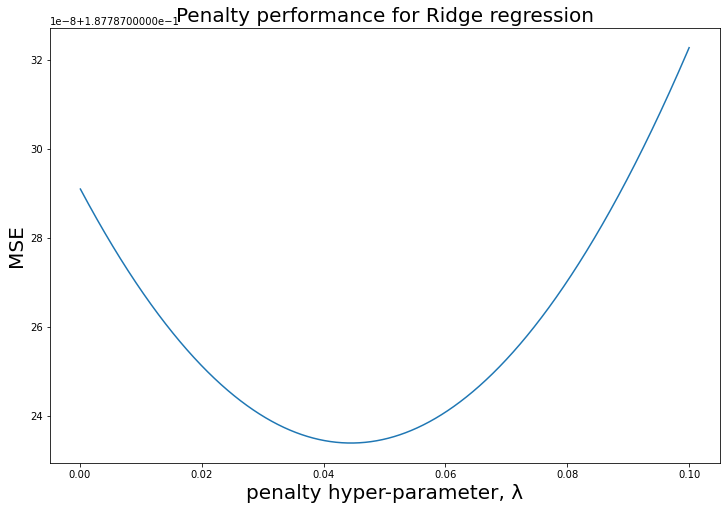

In [60]:
#MSE plot
plt.figure(figsize=(12,8))
plt.plot(penalty_range, penalty_scores);
plt.ylabel('MSE', size=20)
plt.title('Penalty performance for Ridge regression', size=20);
plt.xlabel('penalty hyper-parameter, λ', size=20);

From the graph above we can see that our best penalty infact produces the minimum mean squared error. Since $MSE = Variance - Bias^2$, our best penalty strikes a balance between the bias and variance. 

The MSE is first decreasing. A small λ makes the ridge estimator close to the unbiased linear regression estimator, making the bias go to 0. Hence increasing λ increases the bias.

Adding the λ to the diagonal in $\hat{\beta}_{ridge} = (X^{T}X+\lambda I_p)^{-1}X^{T}Y$ makes the $X^{T} X$ matrix more invertible. Hence increasing λ decreases the reduces the variability in estimated coefficients.

The decrease in variance of the ridge regression estimator exceeds the increase in its bias for small λ hence the MSE is decreasing. Eventually the increase in bias exceeds the decrease in varaince leading to an increase in MSE.  

The above is inline with the results of the derivations of bias and variance in the lecture notes where the resulted equations showed:

-λ $\rightarrow$ 0, bias $\rightarrow$ to 0 and variance tends to $\rightarrow$ $\sigma^2$.

-λ $\rightarrow$ $\inf$, bias $\rightarrow$ to $-\beta$ and variance tends to $\rightarrow$ 0.

Note: it is comforting to get a convex curve as in the lecture notes it is mentioned that "MSE is a convex quadratic function in the space of parameters" and some dicussion of this is also included.

### 1.2.2
In this section I will carry out Ridge regression using my optimal penalty and then work out the in-sample and out-of-sample $R^2$ score. 

In [61]:
#In sample prediction
y_pred, beta_ridge = predict(X_aug, y_train, X_aug, best_penalty) # training model & getting predictions on train set
r_square_score=r_square(y_train, y_pred)
print('The in-sample R-squared score for Ridge regression is ',r_square_score)

The in-sample R-squared score for Ridge regression is  0.8718259724656923


In [62]:
#out of sample prediction
y_pred, beta_ridge = predict(X_aug, y_train, X_test_aug, best_penalty) # training model & getting predictions on test set
r_square_score = r_square(y_test, y_pred)
print('The out of sample R-squared score for Ridge regression is ',r_square_score)

The out of sample R-squared score for Ridge regression is  0.8642954494735388


The $R^2$ score are again low and again our model only explains 87% of variance in our dependent variables. The fact that the scores for test and training set are similar means Ridge regression model is generalisable. 

In [63]:
pd.DataFrame({'Features' : ['intercept']+list(X.columns.values), 'Beta for ridge regression':beta_ridge, 'Beta for linear regression':beta_aug_lr}).T

,0,1,2,3,4,5,6,7,8,9,10
Features,intercept,CIC0,SM1_Dz(Z),GATS1i,NdsCH,NdssC,MLOGP,FV1,VFV,FV2,FV3
Beta for ridge regression,2.615172,0.044981,1.258525,-0.038263,0.363083,0.004714,0.39054,-0.074538,-0.035688,-0.015243,-0.001494
Beta for linear regression,2.61638,0.044714,1.258719,-0.038009,0.363073,0.004665,0.39051,-0.074603,-0.035707,-0.015259,-0.001803


The $R^2$ score for Ridge regression and Linear Regression are almost identical, therefore Ridge regression hasn't provided us with a better fit to our data and the two models explain a similar percentage of variance in our dependent variable. Furthermore, the two models are just as generalisable.

The betas score for Ridge regression and Linear Regression are almost identical too. Ridge didn't reduce the variability of the estimated coefficients. This is because we used a very small optimal penalty of 0.0445. Hence Ridge Regression model is very similar to the Linear regression model.

<a name="q13"></a>

## 1.3 [^](#outline) Relaxation of Lasso regression
In this Lasso_huber regression we aim to find:

$$\hat{\beta}_{Lasso-Huber}(\lambda)=argmin_{\beta}\left\{\underbrace{\|Y-X \beta\|^{2}+\lambda \sum_{j=1}^{p}L_{c}(\beta_i)}_\text{$=Cost_{Lasso-Huber}(\beta)$}\right\}$$

Where the Huber function is:
 $$L_{c}(\beta_i) = \Bigg\{\begin{array}{lr}
        \frac{\beta_i^2}{2}, & \text{for } |\beta_i| \leq c\\
        c(│\beta_i│-\frac{c}{2}), & \text{otherwise} 
        \end{array}$$

### 1.3.1
In this section I will implement the relaxation of the Lasso optimisation using gradient descent to find the optimal $\hat{\beta}_{Lasso-Huber}$. Where p is the number of predictors, λ is the penalty hyper-parameter, and 𝑐 regulates the 'sharpness' of the Huber functions. Here we will fix c=0. 001.

We want to minimise the $Cost_{Lasso-Huber}(\beta)$. We will use gradient descent to optimise this cost function. Computing its derivative w.r.t. $\beta$ we get:
$$\frac{∂Cost_{Lasso-Huber}(\beta)}{∂\beta}= −2X^{T} Y + 2X^{T} Xβ + \lambda \sum_{j=1}^{p}L'_{c}(\beta_i)$$

We need to compute the derivative of the Huber function:
$$L'_{c}(\beta_i)= \Bigg\{\begin{array}{lr}
        \beta_i, & \text{for } |\beta_i| \leq c\\
        c*sign(\beta), & \text{otherwise} 
        \end{array}$$

In [64]:
def huber(beta, c=1e-3):
    'Computes and returns Huber function at beta'
    return (0.5*beta**2 if abs(beta)<=c else c*(abs(beta)-0.5*c))

In [65]:
def grad_huber(beta, c=1e-3):
    'Computes and returns the derivation of the Huber function at beta'
    return (beta if abs(beta)<=c else c*np.sign(beta))

In [66]:
def minimize_ls_huber(X, y, lambd, n_iters=10000, step_size=1e-3):
    n, p = X.shape
    XX = X.T @ X /n
    Xy = X.T @ y /n
    
    #initialise betas
    beta = np.zeros(shape=(p, 1))

    # gradient descent 
    for i in range(n_iters):
        # calculates the gradient of the cost function of lasso at current beta
        grad = (-2 * Xy).reshape(p,1) + 2*XX @ beta + lambd*np.array([grad_huber(x[0]) for x in beta]).reshape(p, 1)  
        beta = beta - step_size * grad #gradient descent update
      
    return beta

With these gradients and the cost, we can conduct the actual optimisation and update the $\boldsymbol \beta$ with a learning rate $step \space size$, which we shall set to $1e-3$.
I am implementing the updating procedure for $\boldsymbol \beta$
$$
\boldsymbol \beta = \boldsymbol \beta - step \space size \ \frac{\partial Cost_{Lasso-Huber}(\beta)}{\partial \boldsymbol \beta}
$$

### 1.3.2
In this section I will used Lasso-Huber regression with a 5-fold cross-validation to conduct a grid search to find the optimal $\lambda$ hyper-parameter λ. I will also report the in-sample and out-of-sample $R^2$ score of the model with the optimal $\lambda$ hyper-parameter.

In [67]:
def predict(X_train, y_train, X_test, lambd):
    beta = minimize_ls_huber(X_train, y_train, lambd, n_iters=10000, step_size=1e-3)
    y_pred = X_test @ beta #calculate the predictions
    return y_pred, beta

def score(X_train, y_train, X_test, y_test, lambd):
  'We now score the predictions by computing the cost function'
  y_pred, beta = predict(X_train, y_train, X_test, lambd=lambd) 
  #below computes and returns the cost function of our predictions
  return (y_pred - y_test.reshape(-1,1)).T @ (y_pred - y_test.reshape(-1, 1)) + lambd * sum([huber(x[0]) for x in beta])

In [68]:
lambd_range = np.linspace(0.001,0.1, 100) #range over which I try to find an optimal 𝜆 
#we can use the old choose_best_penalty as we agiain want the hyper-parameter minimising the score (cost)
best_lambd, lambd_scores = choose_best_penalty(X_aug, y_train, folds_indexes, lambd_range)
print('best_lambd:', best_lambd)

best_lambd: 0.001


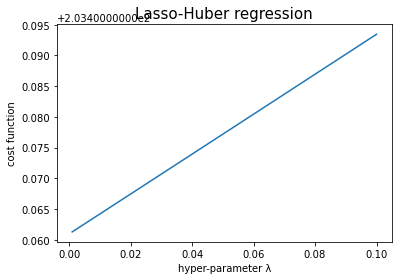

In [69]:
plt.plot(lambd_range, lambd_scores);
plt.ylabel('cost function', size=10)
plt.title('Lasso-Huber regression', size=15)
plt.xlabel('hyper-parameter λ', size=10);

As you can see above, this is a linear curve. Hence the gradient descent does find the true optimal penalty in the 𝜆 range tested, which is the minimum 𝜆 value in the range. I have tried plotting this function over various 𝜆 ranges and the result always is a linear increasing line like above.

In [70]:
#In sample prediction
y_pred, beta = predict(X_aug, y_train, X_aug, best_lambd)
r_square_score=r_square(y_train, y_pred.reshape(-1))
print('The in-sample R-squared score for Lasso-Huber regression is ', r_square_score)

The in-sample R-squared score for Lasso-Huber regression is  0.8308768771816898


In [71]:
#out of sample prediction
y_pred, beta = predict(X_aug, y_train, X_test_aug, best_lambd)
r_square_score=r_square(y_test, y_pred.reshape(-1))
print('The out of sample R-squared score for Lasso-Huber regression is ', r_square_score)

The out of sample R-squared score for Lasso-Huber regression is  0.8242101787519777


The in-sample and out of sample $R^2$ scores are similar which means our Lasso_Huber model is generalisable. However these scores are lower than that of the Ridge regression model by about 0.5, hence we can conclude that the Lasso-Huber model explains 5% less variance in our dependent variables than the Ridge regression model.

In [72]:
pd.DataFrame({'Features' : ['intercept']+list(X.columns.values), 'Estimated beta for ridge regression':beta_ridge, 'Estimated beta for Lasso-Huber regression':beta.reshape(len(beta))}).T

,0,1,2,3,4,5,6,7,8,9,10
Features,intercept,CIC0,SM1_Dz(Z),GATS1i,NdsCH,NdssC,MLOGP,FV1,VFV,FV2,FV3
Estimated beta for ridge regression,2.615172,0.044981,1.258525,-0.038263,0.363083,0.004714,0.39054,-0.074538,-0.035688,-0.015243,-0.001494
Estimated beta for Lasso-Huber regression,1.114948,0.344801,0.969544,-0.193489,0.394037,0.071028,0.431428,-0.010009,-0.01564,0.006561,0.482185


Overall beta components for Lasso-Huber are smaller than for ridge regression. This means that the variability of the Lasso-Huber beta estimator is smaller than that of the Ridge regression beta estimator.

I can't conclude that which one out of Ridge regression or Lasso-Huber regression is better. As the former model explains greater variance in the dependent variable and the latter has a smaller variance of its estimator.

Below I plot the Huber function and its derivative to make sure I am implementing it correctly.

In [73]:
beta_i_range = np.arange(-0.005, 0.005, 0.001) #beta range to plot the functions over 
huber_vals = [huber(beta) for beta in beta_i_range] # computes huber function values over beta range
grad_huber_vals = [grad_huber(beta) for beta in beta_i_range] # computes derivative of huber function values over beta range

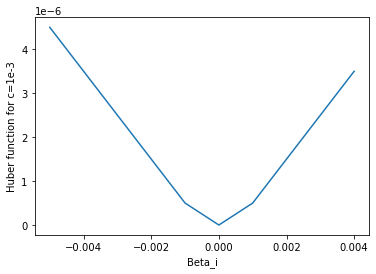

In [74]:
plt.plot(beta_i_range, huber_vals)
plt.ylabel('Huber function for c=1e-3', size=10)
plt.xlabel('Beta_i', size=10);

The above graph shows that the implemetation of Huber function is correct as its used for its property of reducing all the $\beta_i$s to 0.

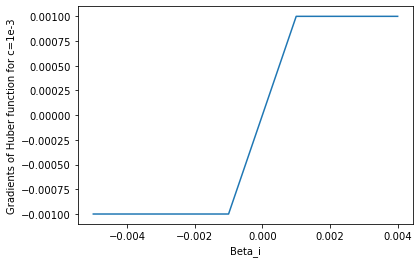

In [75]:
plt.plot(beta_i_range, grad_huber_vals)
plt.ylabel('Gradients of Huber function for c=1e-3', size=10)
plt.xlabel('Beta_i', size=10);

The above graph shows that the implemetation of derivative of Huber function is correct as its 0 when $\beta_i$ is 0. Hence the minimize_ls_huber function is taking $\beta_i$s to 0.

<a name="task-2"></a>

# Task 2: Classification [^](#outline)

<a name="q21"></a>

## 2.1 [^](#outline) kNN classifier
KNN is a simple prediction algorithm. It can be simply summarised as below:
1. Calculate the distance from x to all points in training data.
2. Sort the points in your training data by increasing distance from x.
3. Predict the majority label of teh 'k' closest training data points.

### 2.1.1
In this section I will implement K-nearest neighbour (KNN) alogorithm with 5-fold cross-validation to optain the optimal hyper-parameter k. 

In [76]:
df1= pd.read_csv('tumour_samples.csv') # reading in train data set file

# convert categorical labels to numbers
diag_map = {'M': 1, 'B': 0} #giving binary values to classification strings 
df1['DIAGNOSIS'] = df1['DIAGNOSIS'].map(diag_map) #Sets M to 1 and B to 0

X_train_df = df1.iloc[:,:-1].drop(df1.columns[0], axis=1) #seperate predictor features
y_train_df = df1.iloc[:,-1] # seperate target feature

df2= pd.read_csv('tumour_test.csv') # reading in test data set file
df2['DIAGNOSIS'] = df2['DIAGNOSIS'].map(diag_map) #Sets M to 1 and B to 0

X_test_df = df2.iloc[:,:-1].drop(df2.columns[0], axis=1) #seperate predictor features
y_test_df = df2.iloc[:,-1] # seperate target feature



In [77]:
def standardise(X, mu, sigma):
  X_std = (X - mu) / sigma 
  return X_std

In [78]:
mu = np.mean(X_train_df, 0) # computes the mean on X train set over the columns
sigma = np.std(X_train_df, 0) # computes the standard deviation on X train set over the columns

X_train_df = standardise(X_train_df, mu, sigma) # scale and centre the X train set
X_test_df = standardise(X_test_df, mu, sigma) # scale and centre the X test set similiarly to X train set

The reason for standardising the data is to give each feature the same influence in identifying neighbours as otherwise, the features with larger values will dominate the distance hence the outcome of the KNN.

Sometimes it isn't a good idea to normalise for KNN as important features can lose their larger weightage in classification however in our case we assume that each predictor feature has the same weightage.

In [79]:
# shuffling the rows in X and y
p = np.random.permutation(len(y_train_df))
X_train_df = X_train_df.take(p)
y_train_df = y_train_df.take(p)

# Now we have a list of five index arrays, each correspond to one of the five folds.
folds_indexes = np.array_split(np.arange(len(y_train_df)), 5)

In [80]:
#coverting to numpy array as some functions need data without labels 
X_train = X_train_df.to_numpy()
y_train = y_train_df.to_numpy()
X_test = X_test_df.to_numpy()
y_test = y_test_df.to_numpy()

In [81]:
def euclidian_distance(p, q):
    'Calculates and returns the Euclidean distance between two vectors'
    return np.sqrt(np.sum(((p-q))**2, axis=1))

In [82]:
def k_neighbours(X_train, X_test, k=5, return_distance=False):
  n_neighbours = k
  dist = []
  neigh_ind = []
  
  # compute distance from each point x_test in X_test to all points in X_train 
  point_dist = [euclidian_distance(x_test, X_train) for x_test in X_test] 

  # determine which k training points are closest to each test point
  for row in point_dist:
      enum_neigh = enumerate(row)
      sorted_neigh = sorted(enum_neigh, key=lambda x: x[1])[:k]

      ind_list = [tup[0] for tup in sorted_neigh]
      dist_list = [tup[1] for tup in sorted_neigh]

      dist.append(dist_list)
      neigh_ind.append(ind_list)
  
  # return distances together with indices of k nearest neighbours
  if return_distance:
      return np.array(dist), np.array(neigh_ind)
  
  return np.array(neigh_ind)

def predict(X_train, y_train, X_test, k=5):
  # each of the k neighbours contributes equally to the classification of any data point in X_test  
  neighbours = k_neighbours(X_train, X_test, k=k)
  
  # count number of occurences of label and choose the label that has most occurences
  y_pred = np.array([np.argmax(np.bincount(y_train[neighbour])) for neighbour in neighbours]) 

  return y_pred

In [83]:
def score(X_train, y_train, X_test, y_test, k=5):
    'For KNN we score the hyper-parameter based on accuracy of predictions'
    y_pred = predict(X_train, y_train, X_test, k=k) 
    return sum(y_pred==y_test)/ len(y_test) #returns accuracy of predictions

In [84]:
#We need a new function selecting the hyper-parameter as now we seek to maximise rather than minimise the score (accuracy)
def choose_best_k(X_train, y_train, folds, k_range):
  k_scores = np.zeros((len(k_range),))
  
  for i, k in enumerate(k_range):
    k_scores[i] = cross_validation_score(X_train, y_train, folds, k)
    print(f'CV_ACC@k={k}: {k_scores[i]:.5f}') # prints accuracy correpsonsing to each k 

  best_k_index = np.argmax(k_scores) # selects index of k which maximises accuracy
  return k_range[best_k_index] # returns k value maximising accuracy

In [85]:
best_k = choose_best_k(X_train, y_train, folds_indexes, np.arange(1, 15))
print('Best hyper-parameter k found using 5-folds cross-validation:', best_k)

CV_ACC@k=1: 0.99493
CV_ACC@k=2: 0.98324
CV_ACC@k=3: 0.98519
CV_ACC@k=4: 0.98051
CV_ACC@k=5: 0.98363
CV_ACC@k=6: 0.97973
CV_ACC@k=7: 0.98090
CV_ACC@k=8: 0.97740
CV_ACC@k=9: 0.98090
CV_ACC@k=10: 0.97779
CV_ACC@k=11: 0.98012
CV_ACC@k=12: 0.97779
CV_ACC@k=13: 0.97895
CV_ACC@k=14: 0.97740
Best hyper-parameter k found using 5-folds cross-validation: 1


We can see from the above printout that the k value corresponding to the largest accuracy is 1.

### 2.1.2 
In this section I will compare the KNN model at the optimal k hyper-parameter by predicting on X train set and X test set.

In [86]:
print('Train set accuracy at best k:', score(X_train, y_train, X_train, y_train, k=best_k))
print('Test set accuracy at best k:', score(X_train, y_train, X_test, y_test, k=best_k))

Train set accuracy at best k: 1.0
Test set accuracy at best k: 1.0


This is really good as it means that my model is 100% accurate over the training and test set. I would also comment since the best K is 1 (the smallest possible value), the KNN model is as efficient as it can be over all values of K.

<a name="q22"></a>

## 2.2 [^](#outline) Random Forest
Random forest is an modification of the Decision tree algorithm. I will first describe decision tree.  Decision tree is a greedy algorithm where the data samples are split in a left $\boldsymbol y_l$ and right $\boldsymbol y_r$ sample. The splitting is done recurively on each side, giving us a binary-tree type of splittings.  

Samples can be slit given two parameters: the feature index j and a predicate value s.

In order to work out j and s at each split I will implement the cross-entropy to search for j and s that minimses weighted sum of Cross-Entropy for the left and the right samples.

  $$CE(\boldsymbol y; j, s) = p_l \times CE(\boldsymbol y_l) + p_r \times CE(\boldsymbol y_r)$$

where $p_l$ and $p_r$ are, respectively, the cumulative weights of samples on the left and on the right, while $CE(\boldsymbol y)$ is defined as:

$$
\text{CE}(\boldsymbol y) = - \sum_{i=1}^Q \mathbb P (y = c_i) \log (\mathbb P (y = c_i))
$$

where $c_i$ is the i-th class out of $Q$ distinct classes, so $\mathbb P (y = c_i)$ reads the weight of the class $i$ in the current sample $\boldsymbol y$.

For the random forest we include bootstrap on the training-instances and feature bagging at each split to the decision tree algorithm.

### 2.2.1 
In this section, I will train a random forest algorithm employing cross-entropy as the information criterion for the splits in the decision trees. Using 5-fold cross-validation and accuracy as a measure of performance I will optimise over the following hyperparameters: (i) number of decision trees, (ii)depth of trees.

In [87]:
from collections import defaultdict
training_weights = np.ones_like(y_train) / len(y_train) #we will start with uniform weights and update these in the algorithm

# We need a dictionary indicating whether the column index maps to a 
# categorical feature or numerical
# In this example, all features are numerical (categorical=False)
columns_dict = {index: False for index in range(X_train.shape[1])}

We use cross-entropy as the loss function that is our random forest splits. We want to achieve maximal information in our split. The cross entropy-entropy is minimal when the model distribution is equal to the data distribution. 

In [88]:
def cross_entropy_index(y, sample_weights):
  """ 
  Calculate the cross_entropy-index for labels.
  Arguments:
      y: vector of training labels, of shape (N,).
      sample_weights: weights for each samples, of shape (N,).
  Returns:
      (float): the cross_entropy-index for y.
  """

  # count different labels in y，and store in label_weights
  # initialize with zero for each distinct label.
  label_weights = {yi: 0 for yi in set(y)}  
  for yi, wi in zip(y, sample_weights):
      label_weights[yi] += wi

  total_weight = sum(label_weights.values())
  cross_entropy = 0 # initilise cross-entropy to be 0
  for label, weight in label_weights.items():
      p = weight / total_weight #calculates weightage
      cross_entropy -= p*np.log(p) # updating cross entropy

  return cross_entropy

In [89]:
def cross_entropy_split_value(X, y, sample_weights, column, categorical):
  """
  Calculate the cross_entropy-index based on `column` with the split that minimizes the cross_entropy-index.
  Arguments:
      X: training features, of shape (N, D).
      y: vector of training labels, of shape (N,).
      sample_weights: weights for each samples, of shape (N,).
      column: the column of the feature for calculating. 0 <= column < D
      categorical: boolean value indicating whether column is a categorical variable or numerical.
  Returns:
      (float, float): the resulted cross_entropy-index and the corresponding value used in splitting.
  """
  
  unique_vals = np.unique(X[:, column])

  assert len(unique_vals) > 1, f"There must be more than one distinct feature value. Given: {unique_vals}."

  cross_entropy_index_val, threshold = np.inf, None
  
  # split the values of i-th feature and calculate the cost 
  for value in unique_vals:
    (X_l, X_r), (y_l, y_r), (w_l, w_r) = split_samples(X, y, sample_weights, column, value, categorical) 

    # if one of the two sides is empty, skip this split.
    if len(y_l) == 0 or len(y_r) == 0:
      continue
    
    p_left = sum(w_l)/(sum(w_l) + sum(w_r)) #the sum of 2 weights at each split is scaled to 1 
    p_right = 1 - p_left
    #below we calculate the weighted sum of CE on left and right samples
    new_cost = p_left * cross_entropy_index(y_l, w_l) + p_right * cross_entropy_index(y_r, w_r) 
    if new_cost < cross_entropy_index_val: 
      cross_entropy_index_val, threshold = new_cost, value
    
  return cross_entropy_index_val, threshold 

In [90]:
def split_samples(X, y, sample_weights, column, value, categorical):
  """
  Return the split of data whose column-th feature:
    1. equals value, in case `column` is categorical, or
    2. less than value, in case `column` is not categorical (i.e. numerical)

  Arguments:
      X: training features, of shape (N, D).
      y: vector of training labels, of shape (N,).
      sample_weights: weights for each samples, of shape (N,).
      column: the column of the feature for splitting.
      value: splitting threshold  the samples 
      categorical: boolean value indicating whether column is a categorical variable or numerical.
  Returns:
      tuple(np.array, np.array): tuple of subsets of X splitted based on column-th value.
      tuple(np.array, np.array): tuple of subsets of y splitted based on column-th value.
      tuple(np.array, np.array): tuple of subsets of sample weights based on column-th value.
  """ 

  if categorical:
    #if feature is categorical, the samples with feature value equal to threshold are assigned to the left, and vice versa
    left_mask =(X[:, column] == value) 
  else:
    #if feature isn,t categorical, the samples with feature value less than threshold  are assigned to the left, and vice versa.
    left_mask = (X[:, column] < value) 
  
  #below we define output, input and weights of each side
  X_left, X_right = X[left_mask, :], X[~left_mask, :]
  y_left, y_right = y[left_mask], y[~left_mask]
  w_left, w_right  = sample_weights[left_mask], sample_weights[~left_mask]

  return (X_left, X_right), (y_left, y_right), (w_left, w_right)

In [91]:
def cross_entropy_split_rf(n_features, X, y, sample_weights, columns_dict):
  """
  Choose the best feature to split according to criterion.
  Args:
      n_features: number of sampled features.
      X: training features, of shape (N, D).
      y: vector of training labels, of shape (N,).
      sample_weights: weights for each samples, of shape (N,).
      columns_dict: a dictionary mapping column indices to whether the column is categorical or numerical variable.
  Returns:
      (float, int, float): the minimized cross_entropy-index, the best feature index and value used in splitting.
  """
  columns = np.random.choice(list(columns_dict.keys()), n_features, replace=False)
  columns_dict = {c: columns_dict[c] for c in columns}

  min_cross_entropy_index, split_column, split_val = np.inf, 0, 0
  for column, categorical in columns_dict.items():
    # skip column if samples are not seperable by that column.
    if len(np.unique(X[:, column])) < 2:
      continue

    # search for the best splitting value for the given column.
    cross_entropy_index, val = cross_entropy_split_value(X, y, sample_weights, column, categorical)        
    if cross_entropy_index < min_cross_entropy_index:
        min_cross_entropy_index, split_column, split_val = cross_entropy_index, column, val

  return min_cross_entropy_index, split_column, split_val

In [92]:
def classify(tree, x):
  """
  Classify a single sample with the fitted decision tree.
  Args:
      x: ((pd.Dataframe) a single sample features, of shape (D,).
  Returns:
      (int): predicted testing sample label.
  """
  if tree['majority_label'] is not None: 
    return tree['majority_label']

  elif tree['categorical']:
    if x[tree['feature_index']] == tree['value']:
      return classify(tree['left'], x)
    else:
      return classify(tree['right'], x)

  else:
    if x[tree['feature_index']] < tree['value']:
      return classify(tree['left'], x)
    else:
      return classify(tree['right'], x)

In [93]:
def majority_vote(y, sample_weights):
  """
  Return the label which appears the most in y.
  Args:
      y: vector of training labels, of shape (N,).
      sample_weights: weights for each samples, of shape (N,).
  Returns:
      (int): the majority label
  """
  majority_label = {yi: 0 for yi in set(y)}

  for yi, wi in zip(y, sample_weights):
    majority_label[yi] += wi
  return max(majority_label, key=majority_label.get)

In [94]:
def build_tree_rf(n_features, X, y, sample_weights, columns_dict, feature_names, depth,  max_depth=10, min_samples_leaf=2):
  """Build the decision tree according to the data.
  Args:
      X: (np.array) training features, of shape (N, D).
      y: (np.array) vector of training labels, of shape (N,).
      sample_weights: weights for each samples, of shape (N,).
      columns_dict: a dictionary mapping column indices to whether the column is categorical or numerical variable.
      feature_names (list): record the name of features in X in the original dataset.
      depth (int): current depth for this node.
  Returns:
      (dict): a dict denoting the decision tree (binary-tree). Each node has seven attributes:
        1. 'feature_name': The column name of the split.
        2. 'feature_index': The column index of the split.
        3. 'value': The value used for the split.
        4. 'categorical': indicator for categorical/numerical variables.
        5. 'majority_label': For leaf nodes, this stores the dominant label. Otherwise, it is None.
        6. 'left': The left sub-tree with the same structure.
        7. 'right' The right sub-tree with the same structure.
      Example:
          mytree = {
              'feature_name': 'petal length (cm)',
              'feature_index': 2,
              'value': 3.0,
              'categorical': False,
              'majority_label': None,
              'left': {
                  'feature_name': str,
                  'feature_index': int,
                  'value': float,
                  'categorical': bool,
                  'majority_label': None,
                  'left': {..etc.},
                  'right': {..etc.}
              }
              'right': {
                  'feature_name': str,
                  'feature_index': int,
                  'value': float,
                  'categorical': bool,
                  'majority_label': None,
                  'left': {..etc.},
                  'right': {..etc.}
              }
          }
  """
  # include a clause for the cases where (i) all lables are the same, (ii) depth exceed (iii) X is too small
  if len(np.unique(y)) == 1 or depth>=max_depth or len(X)<=min_samples_leaf: 
      return {'majority_label': majority_vote(y, sample_weights)}
  
  else:
    CE, split_index, split_val = cross_entropy_split_rf(n_features, X, y, sample_weights, columns_dict)  
    
    # If CE is infinity, it means that samples are not seperable by the sampled features.
    if CE == np.inf:
      return {'majority_label': majority_vote(y, sample_weights)}
    categorical = columns_dict[split_index]
    (X_l, X_r), (y_l, y_r), (w_l, w_r) = split_samples(X, y, sample_weights, split_index, split_val, categorical) 
    return {
        'feature_name': feature_names[split_index],
        'feature_index': split_index,
        'value': split_val,
        'categorical': categorical,
        'majority_label': None,
        'left': build_tree_rf(n_features, X_l, y_l, w_l, columns_dict, feature_names, depth + 1, max_depth, min_samples_leaf),
        'right': build_tree_rf(n_features, X_r, y_r, w_r, columns_dict, feature_names, depth + 1, max_depth, min_samples_leaf)
    }

In [95]:
def train_rf(B, n_features, X, y,  columns_dict, sample_weights=None):
  """
  Build the decision tree according to the training data.
  Args:
      B: number of decision trees.
      X: (pd.Dataframe) training features, of shape (N, D). Each X[i] is a training sample.
      y: (pd.Series) vector of training labels, of shape (N,). y[i] is the label for X[i], and each y[i] is
      an integer in the range 0 <= y[i] <= C. Here C = 1.
      columns_dict: a dictionary mapping column indices to whether the column is categorical or numerical variable.
      sample_weights: weights for each samples, of shape (N,).
  """
  if sample_weights is None:
      # if the sample weights is not provided, we assume the samples have uniform weights
      sample_weights = np.ones(X.shape[0]) / X.shape[0]
  else:
      sample_weights = np.array(sample_weights) / np.sum(sample_weights)

  feature_names = X.columns.tolist()
  X = X.to_numpy()
  y = y.to_numpy()
  N = X.shape[0]
  training_indices = np.arange(N)
  trees = []
    

  for _ in range(B):
    np.random.seed(333)
    sample = np.random.choice(training_indices, N, replace=True)
    X_sample = X[sample, :]
    y_sample = y[sample]
    w_sample = sample_weights[sample]
    tree = build_tree_rf(n_features, X_sample, y_sample, w_sample, columns_dict, feature_names, depth=1)
    trees.append(tree)

  return trees

def predict_rf(rf, X):
  """
  Predict classification results for X.
  Args:
      rf: A trained random forest through train_rf function.
      X: (pd.Dataframe) testing sample features, of shape (N, D).
  Returns:
      (np.array): predicted testing sample labels, of shape (N,).
  """

  def aggregate(decisions):
    count = defaultdict(int)
    for decision in decisions:
      count[decision] += 1
    return max(count, key=count.get)

  if len(X.shape) == 1:
      return aggregate([classify(tree, X) for tree in rf])
  else:
      return np.array([aggregate([classify(tree, x) for tree in rf]) for x in X])

In [96]:
def rf_score(rf, X_test, y_test):
  y_pred = predict_rf(rf, X_test) 
  return np.mean(y_pred==y_test) #random forest is evaluated on accuracy

In [97]:
#Need to define a new cross_validation_score function as we now have two hyper-parameters
def cross_validation_score(X_train, y_train, folds, B, n_features):
  scores = []
  for i in range(len(folds)):
    val_indexes = folds[i]
    train_indexes = list(set(range(y_train.shape[0])) - set(val_indexes))
    
    X_train_i = X_train.loc[train_indexes, :]
    y_train_i = y_train.loc[train_indexes]
    
    rf = train_rf(B, n_features, X_train_i, y_train_i,  columns_dict, sample_weights=None)

    X_val_i = X_train.loc[val_indexes, :]
    y_val_i = y_train.loc[val_indexes]

    score_i = rf_score(rf ,X_val_i.to_numpy(), y_val_i.to_numpy()) 
    scores.append(score_i)

  # Return the average score
  return sum(scores) / len(scores) 

In [98]:
from numpy import unravel_index
def choose_best_k(X_train, y_train, folds, B_range, n_features_range):
  from numpy import unravel_index
  k_scores = np.zeros((len(B_range),len(n_features_range)))
  
  for i, k in enumerate(B_range):
        for j, l in enumerate(n_features_range):
            k_scores[i, j] = cross_validation_score(X_train, y_train, folds, k, l)
            print(f'CV_ACC@B,n_features={k, l}: {k_scores[i, j]:.3f}')
            
  a = unravel_index(k_scores.argmax(), k_scores.shape) 
  best_B_values = B_range[a[0]] #selects number of trees that maximises accuracy
  best_n_features_value = n_features_range[a[1]] # selects depth of tree that maximises accuracy
  return best_B_values, best_n_features_value

In [ ]:
B_range= np.arange(1, 5)
n_features_range = np.arange(1,10) 
best_B_value, best_n_features_value = choose_best_k(X_train_df, y_train_df, folds_indexes, B_range, n_features_range)

CV_ACC@B,n_features=(1, 1): 0.948 \
CV_ACC@B,n_features=(1, 2): 0.960 \
CV_ACC@B,n_features=(1, 3): 0.961 \
CV_ACC@B,n_features=(1, 4): 0.968 \
CV_ACC@B,n_features=(1, 5): 0.967 \
CV_ACC@B,n_features=(1, 6): 0.970 \
CV_ACC@B,n_features=(1, 7): 0.967 \
CV_ACC@B,n_features=(1, 8): 0.968 \
CV_ACC@B,n_features=(1, 9): 0.970 \
CV_ACC@B,n_features=(2, 1): 0.954 \
CV_ACC@B,n_features=(2, 2): 0.960 \
CV_ACC@B,n_features=(2, 3): 0.963 \
CV_ACC@B,n_features=(2, 4): 0.972 \
CV_ACC@B,n_features=(2, 5): 0.965 \
CV_ACC@B,n_features=(2, 6): 0.967 \
CV_ACC@B,n_features=(2, 7): 0.970 \
CV_ACC@B,n_features=(2, 8): 0.969 \
CV_ACC@B,n_features=(2, 9): 0.973 \
CV_ACC@B,n_features=(3, 1): 0.971 \
CV_ACC@B,n_features=(3, 2): 0.974 \
CV_ACC@B,n_features=(3, 3): 0.975 \
CV_ACC@B,n_features=(3, 4): 0.982 \
CV_ACC@B,n_features=(3, 5): 0.979 \
CV_ACC@B,n_features=(3, 6): 0.983 \
CV_ACC@B,n_features=(3, 7): 0.976 \
CV_ACC@B,n_features=(3, 8): 0.982 \
CV_ACC@B,n_features=(3, 9): 0.981 \
CV_ACC@B,n_features=(4, 1): 0.972 \
CV_ACC@B,n_features=(4, 2): 0.976 \
CV_ACC@B,n_features=(4, 3): 0.979 \
CV_ACC@B,n_features=(4, 4): 0.978 \
CV_ACC@B,n_features=(4, 5): 0.981 \
CV_ACC@B,n_features=(4, 6): 0.982 \
CV_ACC@B,n_features=(4, 7): 0.979 \
CV_ACC@B,n_features=(4, 8): 0.981 \
CV_ACC@B,n_features=(4, 9): 0.976 

Clearly from the print out above we can see that the accuracy is maximum at (3, 6). Here we obtain the highest accuracy of 0.983 over all number of trees and depth of trees in my range that i implemented 5-fold cross validation over. 

In [100]:
print('Using cross-validation the best number of trees is :', best_B_value)
print('Using cross-validation the best depth of trees is :', best_n_features_value)

Using cross-validation the best number of trees is : 3
Using cross-validation the best depth of trees is : 6


### 2.2.2 
In this section I will compare the performance of the optimal random forest on the training data set and test data set using confusion matrix and other metrics. 

In [101]:
rf = train_rf(best_B_value, best_n_features_value, X_train_df, y_train_df, columns_dict) # building a random forest from training data using optimal hyper-parameters

In [102]:
y_pred = predict_rf(rf, X_train) # using the optimal random forest getting predictions on training inputs

In [103]:
def confusion_matrix(y_true, y_pred):
    y_true_malignant = y_true == 1
    y_true_benign = y_true == 0
    y_pred_malignant = y_pred == 1
    y_pred_benign = y_pred == 0
    
    tp = np.sum(y_true_malignant & y_pred_malignant) # true positives
    tn = np.sum(y_true_benign & y_pred_benign) # true negatives
    fp = np.sum(y_pred_malignant & y_true_benign) # false positives
    fn = np.sum(y_pred_benign &  y_true_malignant) # false negatives
    
    recall = tp/(tp + fn) #recall calculation using formula
    precision = tp/(tp + fp) #precision calculation using formula
    accuracy = (tp + tn)/len(y_true) #accuracy calculation using formula
    f_1_score = 2*precision*recall/(precision+recall) #f1 score calculation using formula
    
    print('Confusion matrix:')
    table = pd.DataFrame(
    {'': ['actual malignant', 'actual benign'],
     'predicted malignant': [tp, fp],
     'predicted benign': [fn, tn]
    })
    
    table = table.set_index('')
    print(table)
    
    print('Normalised confusion matrix:')
    table = pd.DataFrame(
    {'': ['actual malignant', 'actual benign'],
     'predicted malignant': [tp/len(y_true), fp/len(y_true)],
     'predicted benign': [fn/len(y_true), tn/len(y_true)]
    })
    
    table = table.set_index('')
    print(table)
    
    print('\n recall:', recall , ', precision:', precision,', accuracy:', accuracy, ', f-1 score:', f_1_score)

In [104]:
#on the data set tumour_samples.csv
print('For our training set')
confusion_matrix(y_train, y_pred)

For our training set
Confusion matrix:
                  predicted malignant  predicted benign
                                                       
actual malignant                  402                22
actual benign                      10              2132
Normalised confusion matrix:
                  predicted malignant  predicted benign
                                                       
actual malignant             0.156664          0.008574
actual benign                0.003897          0.830865

 recall: 0.9481132075471698 , precision: 0.9757281553398058 , accuracy: 0.9875292283710054 , f-1 score: 0.9617224880382775


In [105]:
#on the data set tumour_test.csv
y_pred = predict_rf(rf, X_test)
confusion_matrix(y_test, y_pred)

Confusion matrix:
                  predicted malignant  predicted benign
                                                       
actual malignant                   68                 5
actual benign                       1               126
Normalised confusion matrix:
                  predicted malignant  predicted benign
                                                       
actual malignant                0.340             0.025
actual benign                   0.005             0.630

 recall: 0.9315068493150684 , precision: 0.9855072463768116 , accuracy: 0.97 , f-1 score: 0.9577464788732394


Since our context is predicting whether a tumour is benign or malignant. What is most important is that we don't predict benign for a malignant tumour as this can delay treatment and have catastrophic results. I would comment that our model on unseen test data had a false negative ratio of 0.025, which is only 2.5 per cent. However, this is about 3 times the false negative ratio of the training set. This does suggest that our model is overfitting to the training data (I will argue later using F-1, why the model isn't overfitting to training data). Further evidenced as the accuracy on the training set is ~0.988, however, the accuracy on the test set is lower at 0.97. I would comment that this isn't a large difference which could just be due to the randomness in the algorithm. I would comment that regardless the test set has a very large degree of accuracy. 

The recall for the test set is still quite high at 0.93, however, it is about 0.4 lower than that on the training set. Hence our model is worse at predicting teh true positive (malignant cases) over unseen data.

The precision for test data is higher than training data. Test data precision stands at 1. This means out of the cases that our model did predict as malignant, we can confidently say all of them were infact malignant. Hence our model predictions for malignant tumours is trustworthy. 

The F-1 score is a harmonic mean of recall and precision. This metric works better for unbalanced datasets such as ours. We have many more benign tumours in our data than we do malignant ones. This metric also takes into account that a false negative has a different cost to a false positive in our tumour predictions. Hence I will use this metric over the accuracy of our datasets. The F-1 score of the test and training set are both very close with a difference of ~ 0.01 and higher than 0.95. Hence I would conclude that our random forest is generalisable and isn't overfitting or underfitting to our training data. 

<a name="q23"></a>

## 2.3 [^](#outline) Support vector machine (SVM)

The basic idea of the SVM model is that it is a representation of training data as points in space (of various dimensions), mapped so that the data of the separate categories are divided by a clear gap that is as wide as possible. 

In prediction, the unseen inputs are then mapped into the same space and predicted to belong to a category based on which region (in 2 dimensions, which side of gap) they fall on. 

Hard-margin SVM is formulated in such a way that the data points need to be separable in d-dimensional space. Often this isn't possible hence we use soft-margin SVM when such a strictly separating hyperplane doesn't exist. In this, we score the quality of the hyperplane by penalising the violations for our separating hyperplane.

### 2.3.1
In this section I will train soft margin SVM classifier on training data set using 5-fold cross-validation subsets to optimise the hardness hyper-parameter.

In [106]:
# I add column of ones on alreday standardised data as standardising ones will give divide by 0 error.
X_train_df['intercept'] = np.ones(len(y_train)) # augmented training inputs to allow for intercept term
X_test_df['intercept'] = np.ones(len(y_test))  # augmented test inputs to allow for intercept term

#We change Benign cells to have value -1.0 from 0 as y=1 or y=-1 in SVM classifier
y_train_df = y_train_df.replace(0, -1.0) 
y_test_df = y_train_df.replace(0, -1.0)
y_train[y_train == 0]= -1.0
y_test[y_test == 0]= -1.0

y_train_float = y_train.astype(float)
y_test_float = y_test.astype(float)

In [107]:
#changing dataframe objects into numpy arrays to get rid of category names. 
X_train = X_train_df.to_numpy()
X_test = X_test_df.to_numpy()

Below we will define the soft margin SVM loss function:
$$
\mathcal L (\boldsymbol w) = \frac{1}{2} \| \boldsymbol w \|^2 + \frac{\lambda}{n} \sum_{i=1}^n Hinge \space loss_{i} .
$$
Where,
$$Hinge \space loss_{i}=\max \bigg( 0, \underbrace{ 1-y_i (\boldsymbol w \cdot x_i + b)}_{size \space of \space voilation} \bigg) \,$$

$\boldsymbol w$ is the vector of weights, $\lambda$ the hardness parameter, and $b$ the intercept which is included in our `X` as an additional column of $1$'s.

$\lambda$ allows us to tune how hard teh boundaries can be, allowing for larger or smaller voilations of the contraint.

SVM classifier says that the size of voilation is $\leq 0$ for all points if there is no voilation of constraints and vice versa. 

In [108]:
def compute_cost(w, X, y, hardness_strength=1e5):
  n = X.shape[0]
  distances = 1 - y * (X @ w)   #calculates size of voilation
  distances[distances < 0] = 0  # equivalent to max(0, distance)
  hinge =  distances.mean()  #mean of hinge loss 
    
  # calculate cost
  return 0.5 * np.dot(w, w) + hardness_strength * hinge #computes cost

In [109]:
#We will use stochastic gradient descent to optimise cost.
#Hence need a gradient descent function 
def calculate_cost_gradient(w, X_batch, y_batch, hardness_strength=1e5):
  # if only one example is passed
  if type(y_batch) == np.float64:
      y_batch = np.asarray([y_batch])
      X_batch = np.asarray([X_batch])  # gives multidimensional array

  distance = 1 - (y_batch * (X_batch @ w)) #size of voilation
  dw = np.zeros(len(w))

  for ind, d in enumerate(distance):
      if max(0, d)==0:
          di = w
      else:
          #below we use hardness parameter as learning rate, new w = old w - hardness* gradient of hinge loss
          di = w - (hardness_strength * y_batch[ind] * X_batch[ind])
      dw += di # updating weight

  return dw/len(y_batch)  # average 

In [110]:
def sgd(X, y, max_iterations=2000, stop_criterion=0.01, learning_rate=1e-5, hardness_strength=1e5, print_outcome=False):
  # initialise zero weights
  weights = np.zeros(X.shape[1])
  nth = 0
  # initialise starting cost as infinity
  prev_cost = np.inf
  
  # stochastic gradient descent
  indices = np.arange(len(y))
  for iteration in range(1, max_iterations):
    # shuffle to prevent repeating update cycles
    np.random.seed(333)
    np.random.shuffle(indices)
    X, y = X[indices], y[indices]
    for xi, yi in zip(X, y):
      ascent = calculate_cost_gradient(weights, xi, yi, hardness_strength) 
      weights = weights - (learning_rate * ascent)

    # convergence check on 2^n'th iteration
    if iteration==2**nth or iteration==max_iterations-1:
      # compute cost
      cost = compute_cost(weights, X, y, hardness_strength) 
      if print_outcome:
        print("Iteration is: {}, Cost is: {}".format(iteration, cost))
      # stop criterion
      if abs(prev_cost - cost) < stop_criterion * prev_cost:
        return weights
        
      prev_cost = cost
      nth += 1
  
  return weights

In [111]:
# train the model
w = sgd(X_train, y_train_float, max_iterations=2000, stop_criterion=0.01, learning_rate=1e-5, hardness_strength=1e3, print_outcome=True)
print("Training finished.")

Iteration is: 1, Cost is: 47.988696761969706
Iteration is: 2, Cost is: 39.913994778639406
Iteration is: 4, Cost is: 37.075909027294124
Iteration is: 8, Cost is: 39.07755355660153
Iteration is: 16, Cost is: 34.43255955412561
Iteration is: 32, Cost is: 34.541523311826076
Training finished.


The above confirms correct implementation as the cost function is generally decreasing. There are some fluctuations and this can be explained by the randomness in the stochastic gradient descent method.

In [112]:
def score(w, X, y):
  y_preds = np.sign(X @ w) # predictions
  return np.mean(y_preds == y) # scored on accuracy

In [113]:
def cross_val_evaluate(data, folds, hardness):
  train_scores = []
  val_scores = []
  
  for i in range(len(folds)):
    val_indices = folds[i] # define validation set indices from fold
    # define the training set indices
    train_indices = list(set(range(data.shape[0])) - set(val_indices))
    
    # define the train set
    X_train = data.iloc[train_indices,  :-1] 
    y_train = data.iloc[train_indices, -1]
    
    # define the validation set
    X_val = data.iloc[val_indices,  :-1] 
    y_val = data.iloc[val_indices, -1] 

    # train the model
    w = sgd(X_train.to_numpy(), y_train.to_numpy().astype(float), max_iterations=1025, stop_criterion=0.01, learning_rate=1e-5, hardness_strength=hardness)

    # evaluate
    train_score = score(w, X_train, y_train.to_numpy().astype(float)) #accuracy on training set
    val_score = score(w, X_val, y_val.to_numpy().astype(float)) #accuracy on validation set

    train_scores.append(train_score)
    val_scores.append(val_score)

  return train_scores, val_scores # 

In [114]:
train = pd.concat([X_train_df, y_train_df], axis=1)
a = datetime.datetime.now()
train_scores, val_scores = cross_val_evaluate(train, folds_indexes, hardness=1e3)
b = datetime.datetime.now()
print('The 5-fold cross validation for hardness 1000 took :', b-a, 'to run')
print("Mean accuracy on train sets for hardness 1000 using 5-fold cross validation: {}".format(np.mean(train_scores)))
print("Mean accuracy on validation sets for hardness 1000 using 5-fold cross validation: {}".format(np.mean(val_scores)))

The 5-fold cross validation for hardness 1000 took : 0:00:06.808397 to run
Mean accuracy on train sets for hardness 1000 using 5-fold cross validation: 0.9906470253677165
Mean accuracy on validation sets for hardness 1000 using 5-fold cross validation: 0.9867491903125734


In [115]:
a = datetime.datetime.now()
train = pd.concat([X_train_df, y_train_df], axis=1)
train_scores, val_scores = cross_val_evaluate(train, folds_indexes, hardness=1e-3)
b = datetime.datetime.now()
print('The 5-fold cross validation for hardness 0.001 took :', b-a, 'to run')
print("Mean accuracy on train sets for hardness 0.001 using 5-fold cross validation: {}".format(np.mean(train_scores)))
print("Mean accuracy on validation sets for hardness 0.001 using 5-fold cross validation: {}".format(np.mean(val_scores)))

The 5-fold cross validation for hardness 0.001 took : 0:00:00.496042 to run
Mean accuracy on train sets for hardness 0.001 using 5-fold cross validation: 0.8538585192211464
Mean accuracy on validation sets for hardness 0.001 using 5-fold cross validation: 0.852696050545733


The above printout for hardness 1000 and 0.001 seem realistic. It makes sense that a greater hardness provides a more accurate model as violations are penalised more. This also gives me an idea of what range I should optimise hardness over. 

Since the mean accuracy on train sets and mean accuracy on validation sets are very close, this is a strong indicator that our model isnt over fitting.

The cross-validation algorithm takes longer to run for larger hardness.

I tried increasing the number of folds to 6 and 7. However, on balance I prefer the higher efficiency of using 5-fold. 
Increasing number of folds means less bias towards overestimating the true expected error (as training folds will be closer to the total dataset) but higher variance in the SVM estimator and higher running time (as you are getting closer to the limit case: cross-validation set has only 1 value).

In [116]:
def choose_best_hardness(data, folds, hardness_range):
  train_scores_mean = np.zeros((len(hardness_range),))
  val_scores_mean = np.zeros((len(hardness_range),))
  for i, k in enumerate(hardness_range):
    train_scores, val_scores = cross_val_evaluate(data, folds, k)
    train_scores_mean[i], val_scores_mean[i] = np.mean(train_scores), np.mean(val_scores)
    
  return train_scores_mean, val_scores_mean

In [117]:
print('We will be optimising hardness over the range 0.1 to 4.9 inclusive with interval 0.2')
hardness_range= np.arange(0.1, 5.1, 0.2)
train = pd.concat([X_train_df, y_train_df], axis=1)
train_scores_mean, val_scores_mean  = choose_best_hardness(train, folds_indexes, hardness_range)
print('The optimal hardness parameter from the 5-fold cross-validation is ', hardness_range[np.argmax(val_scores_mean)])

We will be optimising hardness over the range 0.1 to 4.9 inclusive with interval 0.2
The optimal hardness parameter from the 5-fold cross-validation is  4.500000000000001


In [118]:
w =[] 
scores = []
for i, k in enumerate(hardness_range):
    #get weights of the SVM for different hardness strength
    w.append(sgd(X_train, y_train_float, max_iterations=2000, stop_criterion=0.01, learning_rate=1e-5, hardness_strength=k, print_outcome=False))
    scores.append(score(w[i], X_train, y_train_float)) #accuracy in prediction for different hardness strength

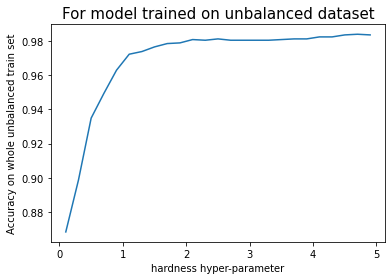

In [119]:
plt.plot(hardness_range, scores)
plt.ylabel('Accuracy on whole unbalanced train set', size=10)
plt.xlabel('hardness hyper-parameter', size=10)
plt.title('For model trained on unbalanced dataset', size=15);

I have plotted the above graph over many hardness ranges. I have found that in general the bigger the hardness, the more accurate the model, although the rate of increase in accuracy starts to decrease to increasing hardness.

Low hardness is less accurate as it isn't perfectly splitting. As the hardness tends to 0, we are no longer penalising data for violating the constraints. This means we will be predicting the classes randomly for data points. Hence the model will have an equal probability of assigning malignant or benign to an input. Hence the accuracy will be 50% for a balanced data set and less for an unbalanced one.

High hardness is more accurate as we are now penalising the size of violations more in our model training, hence it's more accurate. In its limit, it approaches Hard-margin SVM which has accuracy 1. Not all classification data can be linearly separable hence increasing hardness too much can make my data unclassifiable.

After a certain hardness parameter, the accuracy starts to stabilise. Here increasing the accuracy any further doesn't improve the model significantly and just leads to a more inefficient training of the model. 

### 2.3.2 
In this section, I predict on the test set using the same range of hardness values as tested in the previous section. I will then plot the ROC curve for different hardness parameters to select the optimal.

In [120]:
w =[] 
scores = []
for i, k in enumerate(hardness_range):
    #get weights of the SVM for different hardness strength
    w.append(sgd(X_train, y_train_float, max_iterations=2000, stop_criterion=0.01, learning_rate=1e-5, hardness_strength=k, print_outcome=False))
    scores.append(score(w[i], X_test, y_test_float)) #accuracy in prediction for different hardness strength

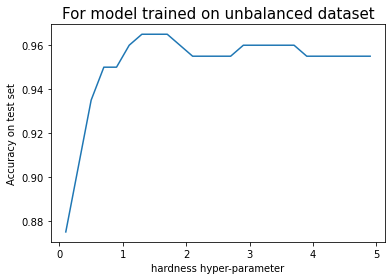

In [121]:
plt.plot(hardness_range, scores)
plt.ylabel('Accuracy on test set', size=10)
plt.xlabel('hardness hyper-parameter', size=10)
plt.title('For model trained on unbalanced dataset', size=15);

This shows that the accuracy of our SVM model increases sharply when the penalty is small on the test data. However, it starts to fluctuate around 0.96 accuracies and the graph isn't as smooth as the earlier curve for training data. This is because of the variance in our SVM estimator and that our test set (~200 points) is about 93% smaller than the training set hence there aren't simple enough points to predict to get an accurate accuracy estimate of the model on unseen data. 

In [122]:
def roc_curve(y_true, y_log):
    y_true_malignant = y_true == 1 #actually malignant
    y_true_benign = y_true == -1 #actually benign
    y_log_malignant = y_log == 1 #predicted malignant
    y_log_benign = y_log == -1 #predicted benign
    
    tp = np.sum(y_true_malignant & y_log_malignant) # true positives
    tn = np.sum(y_true_benign & y_log_benign) # true negatives
    fp = np.sum(y_log_malignant & y_true_benign) # false positives
    fn = np.sum(y_log_benign &  y_true_malignant) # false negatives
    
    tpr = tp / (tp + fn) #true positive rate
    fpr = fp / (tn + fp) #true negative rate        
    
    return tpr, fpr

In [123]:
tpr, fpr = np.zeros(len(w)), np.zeros(len(w))
for i, k in enumerate(w):
    new_ypred = np.array(np.sign(X_test @ k)) #gets predictions based on sample weights of each model
    tpr[i], fpr[i] = roc_curve(y_test, new_ypred) #plot ROC curve for each model

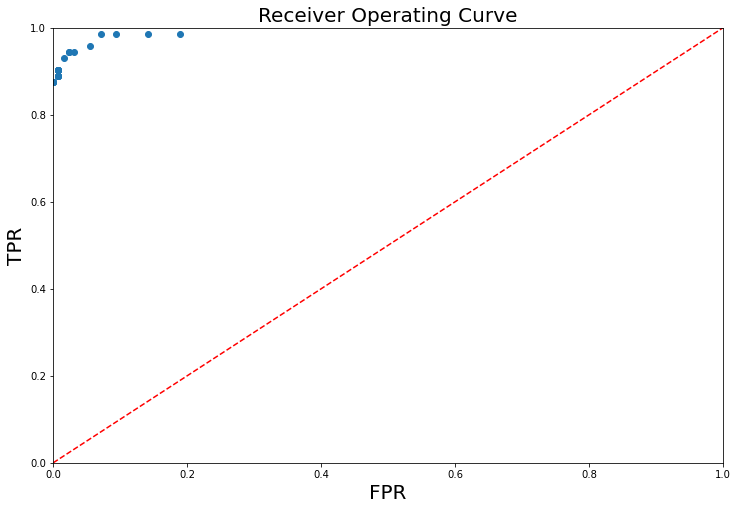

In [124]:
#plotting the ROC
plt.figure(figsize=(12,8))
plt.plot(fpr, tpr, 'o')
plt.ylabel('TPR', size=20)
plt.xlabel('FPR', size=20)
plt.title(f"Receiver Operating Curve", size=20)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.show()

The above ROC curve isn't very clear so below we will zoom in to where the points are to find the optimal penalty. Some points are also overlapping hence we will try to identify where this is happening by using a more translucent point plot.

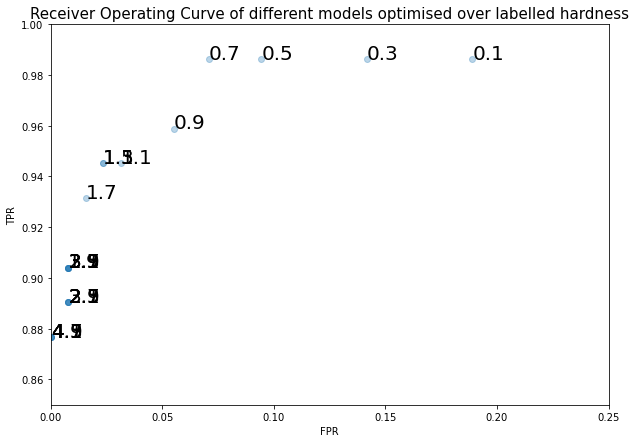

In [126]:
#Zooming into ROC to area of interest and adding hardness hyper-parameter labels
fig, ax = plt.subplots(figsize=(10, 7))
ax.scatter(fpr, tpr, marker='o', alpha=0.3)
plt.ylabel('TPR', size=10)
plt.xlabel('FPR', size=10)
plt.title(f"Receiver Operating Curve of different models optimised over labelled hardness", size=15)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 0.25])
plt.ylim([0.85, 1])
for i, txt in enumerate(hardness_range):
    ax.annotate(round(txt, 7), (fpr[i], tpr[i]), fontsize=20)
plt.show()

Some models have the same true positive rate and false positive rate and hence overlapping of points exists in the curve above. 

In cancer terms, the true positive rate is more important than the false-positive rate. We want to spot all positive cancer cases early even if it means some of the positives were false as further tests can make sure false positive patients aren't given cancer treatment. However, if a Malignant tumour is falsely identified, it can lead to the death of a patient without cancer treatment. From my ROC curve, it is clear that I should choose the point with the largest TPR and lowest FPR but to strike a balance having a larger TPR is more important than having a small FPR. Therefore from looking at the above curve I select the hardness hyper-parameter to be 0.7.

I would also like to comment that this optimal is much better than optimal hardness parameter of 4.7, which was found by cross validation. From the curve above we can see that hardness of 0.7 has a larger TPR by about 0.1 than hardness of 4.7. This is significant even if it comes with an increase in FPR by ~0.7. Hence overall I select the optimal hardness to be 0.7.

### 2.3.3 

In [127]:
df1= pd.read_csv('tumour_samples_bal.csv') # reading in balanced train data set file

# convert categorical labels to numbers
diag_map = {'M': 1, 'B': -1}
df1['DIAGNOSIS'] = df1['DIAGNOSIS'].map(diag_map)

X_train_df = df1.iloc[:,:-1].drop(df1.columns[0], axis=1) #seperate predictor features
y_train_df = df1.iloc[:,-1] # seperate target feature

In [128]:
mu = np.mean(X_train_df, 0) # computes the mean on X train set over the columns
sigma = np.std(X_train_df, 0) # computes the standard deviation on X train set over the columns

X_train_df = standardise(X_train_df, mu, sigma) # scale and centre the X train set

In [129]:
X_train_df['intercept'] = np.ones(len(y_train_df)) # augmented training inputs to allow for intercept term

In [130]:
# shuffling the rows in X and y
p = np.random.permutation(len(y_train_df))
X_train_df = X_train_df.take(p)
y_train_df = y_train_df.take(p)

# Now we have a list of five index arrays, each correspond to one of the five folds.
folds_indexes = np.array_split(np.arange(len(y_train_df)), 5)

In [131]:
X_train = X_train_df.to_numpy() #converting datarame to numpy array
y_train = y_train_df.to_numpy() #converting datarame to numpy array

y_train_float = y_train.astype(float)

In [132]:
print('We will be optimising hardness over the range 0.1 to 4.9 inclusive with interval 0.2')
hardness_range= np.arange(0.1, 5.1, 0.2)
train = pd.concat([X_train_df, y_train_df], axis=1) #compiling training set for SVM
train_scores_mean, val_scores_mean  = choose_best_hardness(train, folds_indexes, hardness_range) #run cross validation over hardness range
print('The optimal hardness parameter from the 5-fold cross-validation is ', hardness_range[np.argmax(val_scores_mean)])

We will be optimising hardness over the range 0.1 to 4.9 inclusive with interval 0.2
The optimal hardness parameter from the 5-fold cross-validation is  4.1000000000000005


In [133]:
w =[] 
scores = []
for i, k in enumerate(hardness_range):
    #get weights of the SVM for different hardness strength
    w.append(sgd(X_train, y_train_float, max_iterations=2000, stop_criterion=0.01, learning_rate=1e-5, hardness_strength=k, print_outcome=False))
    scores.append(score(w[i], X_train, y_train_float)) #accuracy in prediction for different hardness strength

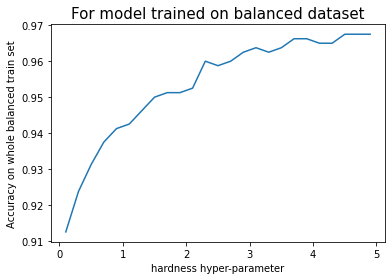

In [134]:
plt.plot(hardness_range, scores)
plt.ylabel('Accuracy on whole balanced train set', size=10)
plt.xlabel('hardness hyper-parameter', size=10)
plt.title('For model trained on balanced dataset', size=15);

The above curve follows the same general trend as for the unbalanced data set but fluctuates more. This is solely because the balanced training set (800 points) has around 3 times fewer values than the unbalanced data set (2566 points), hence our balanced model wasn't able to be trained well.

In [135]:
w =[] 
scores = []
for i, k in enumerate(hardness_range):
    #get weights of the SVM for different hardness strength
    w.append(sgd(X_train, y_train_float, max_iterations=2000, stop_criterion=0.01, learning_rate=1e-5, hardness_strength=k, print_outcome=False))
    scores.append(score(w[i], X_test, y_test_float)) #accuracy in prediction for different hardness strength

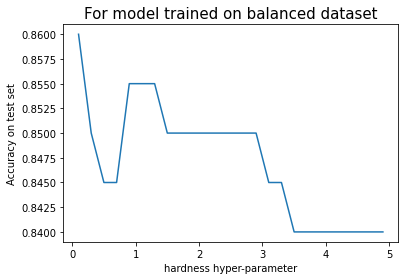

In [136]:
plt.plot(hardness_range, scores)
plt.ylabel('Accuracy on test set', size=10)
plt.xlabel('hardness hyper-parameter', size=10)
plt.title('For model trained on balanced dataset', size=15);

This is interesting. Unlike when the model is trained on the unbalanced data set where the accuracy for test set keeps increasing with increasing hardness, here for model trained on balanced datset the accuracy on test set decreases overall for increasing hardness. This suggests that the balanced dataset is less seperable than the unbalanced dataset. Hence when we incrase the hardness, the margin in the SVM becomes smaller ('harder'), making the model prone to over-fitting or being too senstive to outliers.

Hence at the optimal penalty the model is overfitting to the train set and underfitting to the test set. We should change our optimal penalty to a lower penalty. The ROC curve confirms this.

In [137]:
tpr, fpr = np.zeros(len(w)), np.zeros(len(w))
for i, k in enumerate(w):
    new_ypred = np.array(np.sign(X_test @ k)) #gets predictions based on sample weights of each model
    tpr[i], fpr[i] = roc_curve(y_test, new_ypred) #plot ROC curve for each model

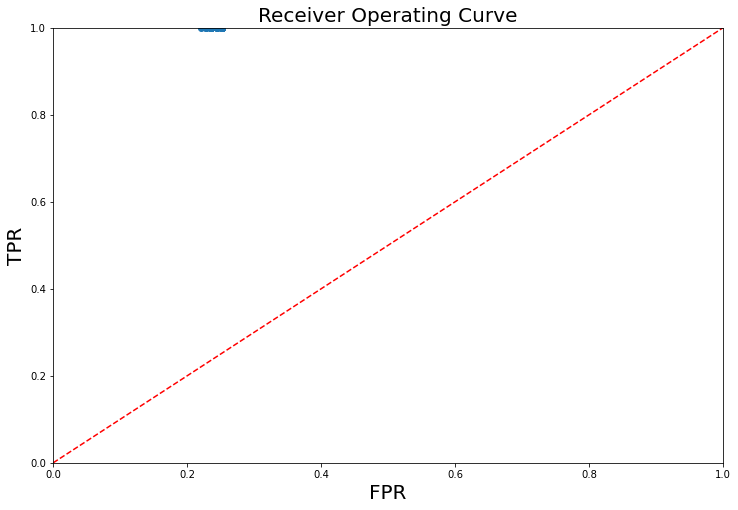

In [138]:
#plotting the ROC
plt.figure(figsize=(12,8))
plt.plot(fpr, tpr, 'o')
plt.ylabel('TPR', size=20)
plt.xlabel('FPR', size=20)
plt.title(f"Receiver Operating Curve", size=20)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.show()

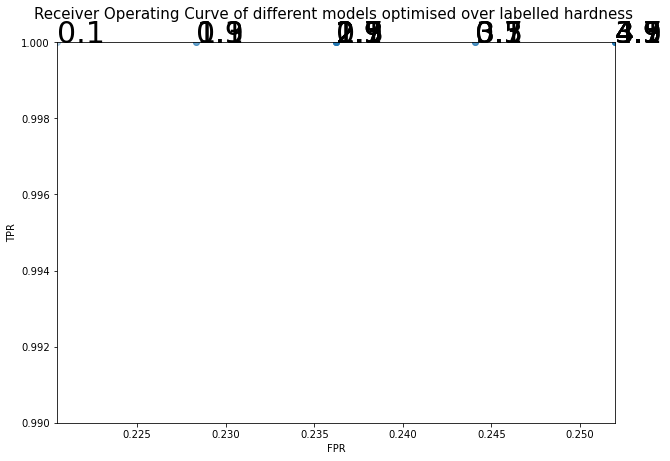

In [139]:
#Zooming into ROC to area of interest and adding hardness hyper-parameter labels
fig, ax = plt.subplots(figsize=(10, 7))
ax.scatter(fpr, tpr, marker='o', alpha=0.3)
plt.ylabel('TPR', size=10)
plt.xlabel('FPR', size=10)
plt.title(f"Receiver Operating Curve of different models optimised over labelled hardness \n", size=15)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([min(fpr), max(fpr)]) # adjust to zoom into area of interest
plt.ylim([0.99, 1]) # adjust to zoom into area of interest
for i, txt in enumerate(hardness_range):
    ax.annotate(round(txt, 7), (fpr[i], tpr[i]), fontsize=30)
plt.show()

In the above ROC curve, the highest TPR and lowest FPR occurs at the hardness of 0.1, hence this is optimal hardness from the ROC curve.

The cross-validation hardness for the balanced train set model gave the optimal hardness to be 4.1. We can that even though the TPR of hardness 0.1 and 4.1 (~1) are the same from the ROC, the FPR is higher by ~0.03 for the hardness of 4.7. Hence the ROC optimal hardness of 0.1 is better than that of the cross-validation.

The model trained on a balanced dataset is worse because at the optimal hardness the TPR is higher by only ~0.01 compared to optimal from the model trained on unbalanced data, however, the FPR is lower by ~0.12 (greater than 10x the increase in TPR). Hence I will use the unbalanced data trained model in the context of identifying malignant tumours. I believe a higher TPR is more important than a lower FPR in general but not by the proportions described. 